In [1]:
import pandas as pd

In [2]:
RTA_data=pd.read_csv('C:/Users/Amruth PC/Desktop/Statistics/RTA_Assignement1.csv')
RTA_data.head()

,Serial number,Age (yrs),Gender,Occupation,Site of death,Time of death,"Alco,Drug etc",Use of helmet,Type of vehicle,Period of coma (hrs),Person died
0,1,24,Male,Bussinesman,On the way,After 1 hour,Yes,No,Scooter,1.0,Rider
1,2,63,Male,Retired Person,Hospital,After 120 hours,Yes,No,Scooty,120.0,Rider
2,3,23,Female,Student,Spot,Immediately,Yes,No,Scooter,NaN,Pillion
3,4,41,Female,Student,Hospital,After 144 hours,Yes,Na,Kinetic Honda,144.0,Rider
4,5,25,Male,Employee,Hospital,After 192 hours,Yes,Yes,RX 100,192.0,Rider


## How many children (<= 18 years) have died in the accident and how many of them are males and females?

In [3]:
import numpy as np
Childdeaths=RTA_data[RTA_data['Age (yrs)']<=18][['Age (yrs)','Gender']]
Childdeaths.groupby(['Gender'])['Gender'].agg([np.size])

,size
Gender,
Female,2
Male,6


## How many children had taken alcohol? Were they riders or pillion when they died?

In [394]:
import numpy as np
Childdrunkdata=RTA_data[(RTA_data['Age (yrs)']<=18) & (RTA_data['Alco,Drug etc']=='Yes')][['Age (yrs)','Gender','Alco,Drug etc','Person died']]
print('Children had taken alcohol :',len(Childdrunkdata))
Childdrunkdata

Children had taken alcohol : 3


,Age (yrs),Gender,"Alco,Drug etc",Person died
26,17,Female,Yes,Pillion
35,12,Male,Yes,Pillion
36,18,Male,Yes,Rider


## Were they riders or pillion when they died?

In [5]:
Childdrunkdata.groupby(['Person died'])['Person died'].agg([np.size])

,size
Person died,
Pillion,2
Rider,1


## How many children have died immediately in the accident as pillion riders who had consumed alcolhol?

In [396]:
import numpy as np
Childdrunkpillondata=RTA_data[(RTA_data['Age (yrs)']<=18) & (RTA_data['Alco,Drug etc']=='Yes') & (RTA_data['Person died']=='Pillion')][['Age (yrs)','Gender','Alco,Drug etc','Person died','Time of death']]
print('Count of Children have died immediately in the accident as pillion riders are :',len(Childdrunkpillondata))
Childdrunkpillondata

Count of Children have died immediately in the accident as pillion riders are : 2


,Age (yrs),Gender,"Alco,Drug etc",Person died,Time of death
26,17,Female,Yes,Pillion,Immediately
35,12,Male,Yes,Pillion,Immediately


In [7]:
Childdrunkpillondata.groupby(['Time of death'])['Time of death'].agg([np.size])

,size
Time of death,
Immediately,2


## How many have died under the influence of alcohol/drug and without wearing helmet?

In [397]:
AlcoholNoHelmet=RTA_data[(RTA_data['Use of helmet']=='No') & (RTA_data['Alco,Drug etc']=='Yes')][['Alco,Drug etc','Use of helmet']]
print('Number of died under the influence of alcohol/drug and without wearing helmet :',len(AlcoholNoHelmet))

Number of died under the influence of alcohol/drug and without wearing helmet : 19


## How many of them have died between the age group of 31 - 40 years inspite of wearing helmet?

In [398]:
Age31to40withhelmet=RTA_data[(RTA_data['Age (yrs)']>=31) & (RTA_data['Age (yrs)']<=40) & (RTA_data['Use of helmet']=='Yes')][['Age (yrs)','Alco,Drug etc','Use of helmet']]
print('Number died between the age group of 31 - 40 years inspite of wearing helmet :',len(Age31to40withhelmet))

Number died between the age group of 31 - 40 years inspite of wearing helmet : 2


In [10]:
RTA_data.columns

Index(['Serial number', 'Age (yrs)', 'Gender', 'Occupation', 'Site of death',
       'Time of death', 'Alco,Drug etc', 'Use of helmet', 'Type of vehicle',
       'Period of coma (hrs)', 'Person died'],
      dtype='object')

## What is the ratio of male and female who died on the spot?

In [11]:
MorFOnspot=RTA_data[RTA_data['Site of death']=='Spot'][['Gender','Site of death']]
MorFOnspot.groupby(['Gender'])['Gender'].agg([np.size])

,size
Gender,
Female,5
Male,14


In [56]:
TOD=RTA_data[RTA_data['Site of death']=='Hospital'][['Time of death']]
TOD

,Time of death
1,After 120 hours
3,After 144 hours
4,After 192 hours
7,Immediately
9,After 2 hours
10,After 236 hours
11,After 240 hours
13,After 260 hours
14,After 284 hours
15,After 3 hours


## Whai is the medianal survival time  and IQR of RTA victims who died in the hospital?

In [61]:
import statistics
ls_time_death=[]
for i in TOD['Time of death']:
    if(i=='Immediately'):
        ls_time_death.append(0)
    else:
        ls_time_death.append(int(i.split()[1]))
TOD['hospital_death']=ls_time_death
print("Median of survival time of hospital deaths : % s " % TOD['hospital_death'].median())
IQR=TOD['hospital_death'].quantile(0.75)-TOD['hospital_death'].quantile(0.25)
print("IQR of survival time in hospital : % s " %(IQR))

Median of survival time of hospital deaths : 72.0 
IQR of survival time in hospital : 139.0 


## How many of them have died in the hospital for whom wearing of helmet details not available? 

In [399]:
Na_UOH_data=RTA_data[RTA_data['Use of helmet']=='Na']
print('No of died in the hospital for whom wearing of helmet details not available :',len(Na_UOH_data))

No of died in the hospital for whom wearing of helmet details not available : 10


In [400]:
PHelmetYes=len(RTA_data[RTA_data['Use of helmet']=='Yes'])/(len(RTA_data['Use of helmet'])-len(Na_UOH_data))
PHelmetNo=len(RTA_data[RTA_data['Use of helmet']=='No'])/(len(RTA_data['Use of helmet'])-len(Na_UOH_data))
phelmetY=1/2
phelmetN=1/2
print('Probability of Dead victims Wearing Helmet :',PHelmetYes)
print('Probability of Dead victims Not Wearing Helmet :',PHelmetNo)


Probability of Dead victims Wearing Helmet : 0.075
Probability of Dead victims Not Wearing Helmet : 0.925


### Probability of dead with out wearing helmet is more compared to with wearing helmet .So the high probability of dead people is they are not wearing helmet

In [401]:
Naprediction=RTA_data[((RTA_data['Use of helmet']=='Yes') | (RTA_data['Use of helmet']=='No')) & (RTA_data['Site of death']=='Hospital')]
Naprediction=pd.crosstab(Naprediction['Use of helmet'],'count')
Naprediction

col_0,count
Use of helmet,
No,17
Yes,2


## What is the medianal period of coma (hrs) and IQR of RTA victims who died in the hospital?

In [403]:
print("Median of survival time is : % s " % ((RTA_data[RTA_data['Site of death']=='Hospital']['Period of coma (hrs)']).median()))
IQR=RTA_data[RTA_data['Site of death']=='Hospital']['Period of coma (hrs)'].quantile(0.75)-RTA_data[RTA_data['Site of death']=='Hospital']['Period of coma (hrs)'].quantile(0.25)
print("IQR of survival time is : % s " %(IQR))

Median of survival time is : 72.0 
IQR of survival time is : 150.25 


## What is the ratio of students to bussinessmen who died in RTA under the influence of alcohol?

In [113]:
BMvsStu=RTA_data[((RTA_data['Occupation']=='Bussinesman') | (RTA_data['Occupation']=='Student')) & (RTA_data['Alco,Drug etc']=='Yes')]
BMvsStudata=pd.crosstab(BMvsStu['Occupation'],'count')
BMvsStudata.reset_index()

col_0,Occupation,count
0,Bussinesman,5
1,Student,6


In [122]:
print('Students vs Businessman ratio :',BMvsStudata['count'][1]/BMvsStudata['count'][0])

Students vs Businessman ratio : 1.2


## State some of the hypothesis which may be formulated based on this data?  And test these hypothesis

# Hypothesis Drawn from data set

## chi Square Test

### Gender VS Drugs consumption
- H0 - There is no association between Gender and Drugs consumption
- H1 - There is association between Gender and Drugs consumption

### Gender VS Use of Helmet
- H0 - There is no association between Gender and Use of Helmet
- H1 - There is association between Gender and Use of Helmet

## ------------------------------------------------------------------------------------------------------------------------------
## Two sample T test

### Mean Survival VS Age
- H0 - Survival time of people under age 25 years <= Survival time of people above age 25 years
- H1 - Survival time of people under age 25 years > Survival time of people above age 25 years

-------------------------------------------------------------------------------------------------------------------------
### Mean Survival VS Person died
- H0 - Survival time of rider >= Survival time of pillion
- H1 - Survival time of rider < Survival time of pillion




## Is there sufficient data to test these hypothesis? If so use the available and test those hypothesis.

In [136]:
#Gender VS Drugs consumption
#H0 - There is no association between Gender and Drugs consumption
#H1 - There is association between Gender and Drugs consumption
from scipy import stats
GendervsDrugs=pd.crosstab(RTA_data['Gender'],RTA_data['Alco,Drug etc'])
print(GendervsDrugs)

Chivalue,pval,df,Matrix=stats.chi2_contingency(GendervsDrugs)
if(pval>0.05):
    print('\n')
    print('Hypothesis Test Result:')
    print('There is no association between Gender and Drugs consumption as ',pval,'>0.05')
else:
    print('\n')
    print('Hypothesis Test Result:')
    print('There is association between Gender and Drugs consumption as ',pvalue,'<0.05')

Alco,Drug etc  No  Yes
Gender                
Female          4    6
Male           23   17


Hypothesis Test Result:
There is no association between Gender and Drugs consumption as  0.5231857390945609 >0.05


In [137]:
#Gender VS Drugs consumption
#H0 - There is no association between Gender and Use of Helmet
#H1 - There is association between Gender and Use of Helmet

from scipy import stats
GendervsHelmet=pd.crosstab(RTA_data['Gender'],RTA_data[(RTA_data['Use of helmet']=='Yes') | (RTA_data['Use of helmet']=='No')]['Use of helmet'])
print(GendervsHelmet)

Chivalue,pval,df,Matrix=stats.chi2_contingency(GendervsHelmet)
if(pval>0.05):
    print('\n')
    print('Hypothesis Test Result:')
    print('There is no association between Gender and Use of Helmet as',pval,'>0.05')
else:
    print('\n')
    print('Hypothesis Test Result:')
    print('There is association between Gender and Use of Helmet as ',pvalue,'<0.05')


Use of helmet  No  Yes
Gender                
Female          7    1
Male           30    2


Hypothesis Test Result:
There is no association between Gender and Use of Helmet as 0.8807053992773354 >0.05


In [160]:
#Mean Survival VS Age
#H0 - Survival time of people under age 25 years <= Survival time of people above age 25 years
#H1 - Survival time of people under age 25 years > Survival time of people above age 25 years
from scipy import stats
x1=RTA_data[RTA_data['Age (yrs)'] <= 25]['Period of coma (hrs)'].fillna(0).values
x2=RTA_data[RTA_data['Age (yrs)'] > 25]['Period of coma (hrs)'].fillna(0).values
Tcal,Pval=stats.ttest_ind(x1,x2)
if(Pval>0.05):
    print('\n')
    print('Hypothesis Test Result:')
    print('Survival time of people under age 25 years <= Survival time of people above age 25 years',Pval,'>0.05')
else:
    print('\n')
    print('Hypothesis Test Result:')
    print('Survival time of people under age 25 years > Survival time of people above age 25 years ',Pval,'<0.05')



Hypothesis Test Result:
Survival time of people under age 25 years <= Survival time of people above age 25 years 0.9511626587791426 >0.05


In [167]:
#Mean Survival VS Person Died
#H0 - Survival time of rider >= Survival time of pillion
#H1 - Survival time of rider < Survival time of pillion

from scipy import stats
x1=RTA_data[RTA_data['Person died'] == 'Rider']['Period of coma (hrs)'].fillna(0).values
x2=RTA_data[RTA_data['Person died'] == 'Pillion']['Period of coma (hrs)'].fillna(0).values
Tcal,Pval=stats.ttest_ind(x1,x2)
if(Pval>0.05):
    print('\n')
    print('Hypothesis Test Result:')
    print('Survival time of rider >= Survival time of pillion',Pval,'>0.05')
else:
    print('\n')
    print('Hypothesis Test Result:')
    print('Survival time of rider < Survival time of pillion ',Pval,'<0.05')



Hypothesis Test Result:
Survival time of rider >= Survival time of pillion 0.9780793750296337 >0.05


## Use appropriaate graphs to present the data

In [172]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

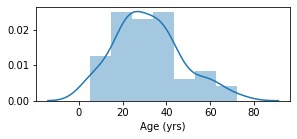

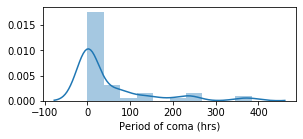

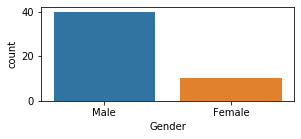

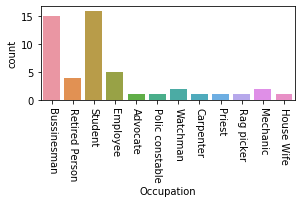

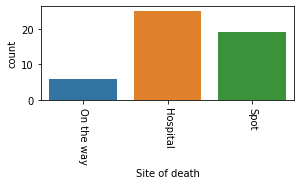

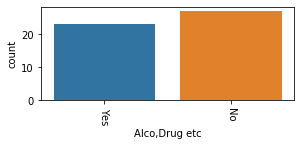

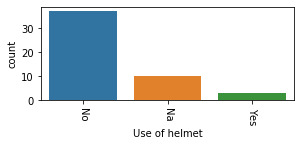

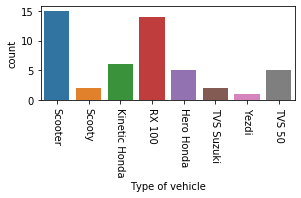

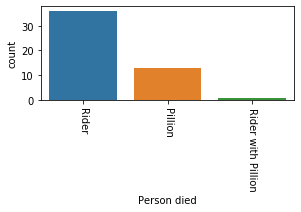

In [246]:
#Distribution Of Age Plot
fig.tight_layout()
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,1)
sb.distplot(RTA_data['Age (yrs)'],kde=True)

#Distribution Of Period of coma Plot
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,2)
sb.distplot(RTA_data['Period of coma (hrs)'].fillna(0),kde=True)

#Frequency Of Gender Plot
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,3)
sb.countplot(RTA_data['Gender'])

#Frequency Of Occupation Plot
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,4)
sb.countplot(RTA_data['Occupation'])
plt.xticks(rotation=270)

#Frequency Of Site of death Plot
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,5)
sb.countplot(RTA_data['Site of death'])
plt.xticks(rotation=270)

#Frequency Of Alco,Drug etc Plot
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,6)
sb.countplot(RTA_data['Alco,Drug etc'])
plt.xticks(rotation=270)

#Frequency Of Use of helmet Plot
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,7)
sb.countplot(RTA_data['Use of helmet'])
plt.xticks(rotation=270)

#Frequency Of Type of vehicle Plot
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,8)
sb.countplot(RTA_data['Type of vehicle'])
plt.xticks(rotation=270)


#Frequency Of Person died Plot
fig=plt.figure(figsize=(10,10))
plt.subplot(5,2,8)
sb.countplot(RTA_data['Person died'])
plt.xticks(rotation=270)




## What are the different types of vehicles used?

In [169]:
RTA_data['Type of vehicle'].unique()

array(['Scooter', 'Scooty', 'Kinetic Honda', 'RX 100', 'Hero Honda',
       'TVS Suzuki', 'Yezdi', 'TVS 50'], dtype=object)

In [170]:
RTA_data.head()

,Serial number,Age (yrs),Gender,Occupation,Site of death,Time of death,"Alco,Drug etc",Use of helmet,Type of vehicle,Period of coma (hrs),Person died
0,1,24,Male,Bussinesman,On the way,After 1 hour,Yes,No,Scooter,1.0,Rider
1,2,63,Male,Retired Person,Hospital,After 120 hours,Yes,No,Scooty,120.0,Rider
2,3,23,Female,Student,Spot,Immediately,Yes,No,Scooter,NaN,Pillion
3,4,41,Female,Student,Hospital,After 144 hours,Yes,Na,Kinetic Honda,144.0,Rider
4,5,25,Male,Employee,Hospital,After 192 hours,Yes,Yes,RX 100,192.0,Rider


## Considering 0 for survival of Rider and 1 for death fit a Logistic regression model for the data by treating all other variables has explanatory variables

In [373]:
#Dependent Variable creation
ls_log=[]
Logreg=RTA_data[['Age (yrs)','Gender','Occupation','Site of death','Alco,Drug etc','Use of helmet','Type of vehicle','Period of coma (hrs)','Person died']]
for i in Logreg['Person died']:
    if (i=='Rider' ):
        ls_log.append(1)
    elif(i=='Rider with Pillion'):
        ls_log.append(1)
    else:
        ls_log.append(0)
Logreg['Period of coma (hrs)']=Logreg['Period of coma (hrs)'].fillna(0) 
        
Logreg['Survival_Rider']=ls_log

#Standardizing the data(Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
Logreg['Age (yrs)']=sc_X.fit_transform(Logreg[['Age (yrs)']])
Logreg['Period of coma (hrs)']=sc_X.fit_transform(Logreg[['Period of coma (hrs)']])


C:\Users\Amruth PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Amruth PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Amruth PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [375]:
Logreg.head()

,Age (yrs),Gender,Occupation,Site of death,"Alco,Drug etc",Use of helmet,Type of vehicle,Period of coma (hrs),Person died,Survival_Rider
0,-0.502034,Male,Bussinesman,On the way,Yes,No,Scooter,-0.549297,Rider,1
1,2.060705,Male,Retired Person,Hospital,Yes,No,Scooty,0.717492,Rider,1
2,-0.567745,Female,Student,Spot,Yes,No,Scooter,-0.559942,Pillion,0
3,0.615057,Female,Student,Hospital,Yes,Na,Kinetic Honda,0.972979,Rider,1
4,-0.436323,Male,Employee,Hospital,Yes,Yes,RX 100,1.483953,Rider,1


In [376]:
#Dividing Dependent and independent variables
X=Logreg.iloc[:,:-1].values
Y=Logreg.iloc[:,-1].values

In [377]:
#Imputing Null Values
#According to question 8 we had proved using bayes that the highest probability of NA values if No Helmet.So I am replacing 
# the NA values in column 'use of helmet' with No.
ls=[]
k=X[:,5]
for i in k:
    if(i=='No'):
        ls.append('No')
    elif(i=='Yes'):
        ls.append('Yes')
    else:
        ls.append('No')  
X[:,5]=ls

In [378]:
#for categorical data applying LabelEncoder which have only two different variables
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,1]=labelencoder_X.fit_transform(X[:,1])
X[:,4]=labelencoder_X.fit_transform(X[:,4])
X[:,5]=labelencoder_X.fit_transform(X[:,5])
X

array([[-0.5020339440972206, 1, 'Bussinesman', 'On the way', 1, 0,
        'Scooter', -0.5492968501636853, 'Rider'],
       [2.06070477577079, 1, 'Retired Person', 'Hospital', 1, 0,
        'Scooty', 0.7174923973068293, 'Rider'],
       [-0.5677451933246055, 0, 'Student', 'Spot', 1, 0, 'Scooter',
        -0.5599421379575552, 'Pillion'],
       [0.6150572927683225, 0, 'Student', 'Hospital', 1, 0,
        'Kinetic Honda', 0.9729793043597063, 'Rider'],
       [-0.4363226948698357, 1, 'Employee', 'Hospital', 1, 1, 'RX 100',
        1.4839531184654602, 'Rider'],
       [1.9292822773160203, 1, 'Retired Person', 'Spot', 0, 0, 'Scooter',
        -0.5599421379575552, 'Rider'],
       [0.2207897974040132, 1, 'Bussinesman', 'Spot', 0, 0, 'Hero Honda',
        -0.5599421379575552, 'Rider'],
       [-0.30490019641506594, 1, 'Bussinesman', 'Hospital', 1, 0,
        'Scooter', -0.5599421379575552, 'Rider'],
       [0.41792354508616786, 1, 'Bussinesman', 'Spot', 0, 0, 'Scooter',
        -0.55994213795

In [379]:
#One hot Encoding for categorical data which have more than two different variables
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,3]=labelencoder_X.fit_transform(X[:,3])
X[:,6]=labelencoder_X.fit_transform(X[:,6])
X[:,8]=labelencoder_X.fit_transform(X[:,8])

X

array([[-0.5020339440972206, 1, 1, 1, 1, 0, 3, -0.5492968501636853, 1],
       [2.06070477577079, 1, 9, 0, 1, 0, 4, 0.7174923973068293, 1],
       [-0.5677451933246055, 0, 10, 2, 1, 0, 3, -0.5599421379575552, 0],
       [0.6150572927683225, 0, 10, 0, 1, 0, 1, 0.9729793043597063, 1],
       [-0.4363226948698357, 1, 3, 0, 1, 1, 2, 1.4839531184654602, 1],
       [1.9292822773160203, 1, 9, 2, 0, 0, 3, -0.5599421379575552, 1],
       [0.2207897974040132, 1, 1, 2, 0, 0, 0, -0.5599421379575552, 1],
       [-0.30490019641506594, 1, 1, 0, 1, 0, 3, -0.5599421379575552, 1],
       [0.41792354508616786, 1, 1, 2, 0, 0, 3, -0.5599421379575552, 1],
       [1.0750360373600167, 1, 1, 0, 0, 0, 1, -0.5386515623698155, 1],
       [0.5493460435409376, 1, 10, 0, 0, 0, 2, 1.9523457813957346, 1],
       [0.8779022896778621, 1, 1, 0, 0, 0, 6, 1.994926932571214, 1],
       [-0.10776644873291125, 1, 1, 2, 1, 0, 7, -0.5599421379575552, 1],
       [1.6664372804064806, 1, 0, 0, 0, 0, 3, 3.2723614678355983, 1],
    

In [380]:
onehotencoder_X=OneHotEncoder(categorical_features=[2,3,6])
X=onehotencoder_X.fit_transform(X).toarray()
X_data=pd.DataFrame(X)
print(X_data)
X_data

     0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   1.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0  0.0  0.0  0.0   
6   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
7   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
8   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
9   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
11  0.0  1.0  0.0  0.0  0.0 

C:\Users\Amruth PC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Amruth PC\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.502034,1.0,1.0,0.0,-0.549297,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.060705,1.0,1.0,0.0,0.717492,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.567745,0.0,1.0,0.0,-0.559942,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.615057,0.0,1.0,0.0,0.972979,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.436323,1.0,1.0,1.0,1.483953,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.929282,1.0,0.0,0.0,-0.559942,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.220790,1.0,0.0,0.0,-0.559942,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.304900,1.0,1.0,0.0,-0.559942,1.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.417924,1.0,0.0,0.0,-0.559942,1.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.075036,1.0,0.0,0.0,-0.538652,1.0


In [381]:
#Data Collecting after all the changes made
X=X_data.values
Y=Logreg.iloc[:,-1].values


In [384]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [387]:
#applying the logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

C:\Users\Amruth PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [390]:
#Predicting values of test set
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [393]:
#Generating Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 1],
       [0, 8]], dtype=int64)